INSA ROUEN MS ESD 2019-2020

Winnie VORIHILALA

# TP 3 - Réduction de dimension

Objectifs : <br>
<br>
􏰀- mise en œuvre de l’ACP <br>
􏰀- test d’une méthode non-linéaire de réduction de dimension <br>
􏰀- mise en œuvre d’une chaine de traitement couplant ACP et classification sur des données réelles

# 1- ACP sur les données Iris

L'ACP ou Analyse en Composantes Principales est un algorithme non supervisé très utilisé en pré-traitement pour réduire la dimension d'un jeu de données ou pour visualiser les données. On parle aussi souvent de PCA, de son nom anglais Principal Components Analysis.

Le but d'une analyse en composantes principales est de trouver une nouvelle base orthonormée dans laquelle représenter nos données, de telle sorte que la variance des données selon les nouveaux axes soit maximisée et l'erreur (ou perte d'information) soit minimisée .

Autrement dit, le PCA est une méthode d’identification des dimensions de variance décroissante et de changement de base pour ne conserver que les k dimensions de plus grande variance.

## 1- Chargement des données Iris

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
from sklearn.datasets import load_iris 

iris = load_iris()

#Extraction de données
X = iris.data
y = iris.target

#Conversion des numpy.array en dataframe
dfX = pd.DataFrame(X)
dfy = pd.DataFrame(y)

#Verification des tailles des dataframes X et y et visualisation des premières lignes 
print("La dimension de dfX est : ", dfX.shape)
print("La dimension de dfy est : ", dfy.shape)
print("Visualisation des 5 premières lignes de dfX ")
print(dfX.head())
print("Visualisation des 5 premières lignes de dfy ")
print(dfy.head())
print("Visualisation d'une ligne quelconque de dfy ")
print(dfy.iloc[100]) #permet d'afficher la 100eme ligne

La dimension de dfX est :  (150, 4)
La dimension de dfy est :  (150, 1)
Visualisation des 5 premières lignes de dfX 
     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
Visualisation des 5 premières lignes de dfy 
   0
0  0
1  0
2  0
3  0
4  0
Visualisation d'une ligne quelconque de dfy 
0    2
Name: 100, dtype: int64


## 2- Implémentation de l'algorithme de l'ACP

## a) 1ère méthode : utilisation de sklearn

In [3]:
from sklearn import preprocessing
from sklearn import decomposition
import matplotlib.pyplot as plt
import numpy as np

### 1ere etape : standardiser les données (centrer et réduire)

std_scale = preprocessing.StandardScaler().fit(dfX)
X_scaled = std_scale.transform(dfX)
print(" ")
print("L'écart-type des données normalisées est égal à : " ,np.std(X_scaled), " .") #ecart type = 1 permet de confirmer que la normalisation (centrer et reduite) des données a bien été effectuée


### 2eme etape : calculer les composantes principales et le pourcentage de variance expliquée
n_comp=2
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

#calculer le pourcentage de variance expliquée 
print(" ")
print("Les ", n_comp, " composantes principales expliquent chacune respectivement :", pca.explained_variance_ratio_*100, "% de la variance observée dans les données.") #donne le pourcentage de var expliquee pour chacune des 2 composantes principales
print(" ")
print("Une dimension reduite à d = ",n_comp, " explique ",pca.explained_variance_ratio_.sum()*100, "% de la variance totale.")
print(" ")

 
L'écart-type des données normalisées est égal à :  1.0  .
 
Les  2  composantes principales expliquent chacune respectivement : [72.96244541 22.85076179] % de la variance observée dans les données.
 
Une dimension reduite à d =  2  explique  95.81320720000164 % de la variance totale.
 


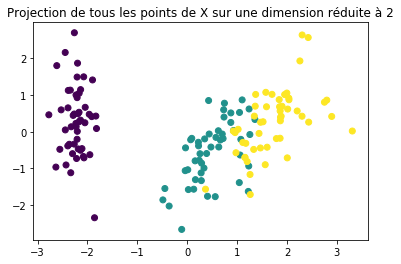

In [4]:
### 3eme etape : projeter X sur les composantes principales

X_projected = pca.transform(X_scaled)

# afficher chaque observation

#graphique simple 
plt.title("Projection de tous les points de X sur une dimension réduite à 2")
plt.scatter(X_projected[:, 0], X_projected[:, 1],c=y) #c=la variable à expliquer(ou variable cible) initiale, sans manip

#graphique plus joli
#fig = plt.figure(figsize = (4,4))
#ax = fig.add_subplot(1,1,1) 
#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
#ax.set_title('2 components PCA', fontsize = 20)
#plt.scatter(X_projected[:, 0], X_projected[:, 1],c=y) #c=la variable à expliquer(ou variable cible) initiale, sans manip
#plt.xlim([-5.5, 5.5])
#plt.ylim([-4, 4])
#plt.colorbar()
#ax.grid()

#### Visualisation des données projetées sur la dimension initiale versus les données projetées sur la dimension réduite 

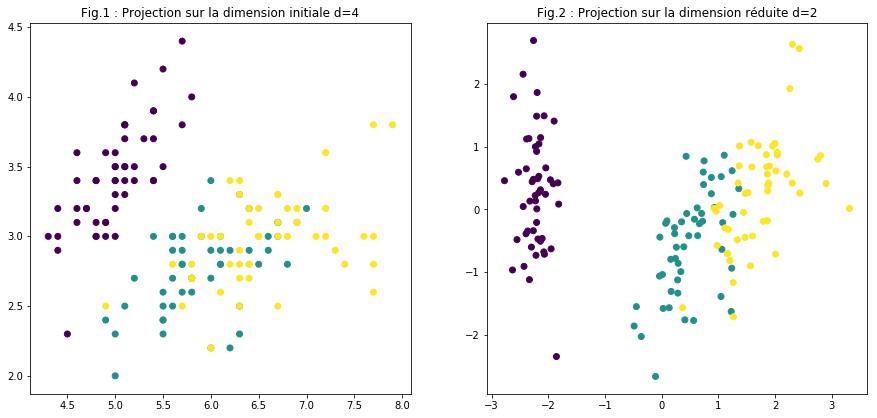

In [11]:
plt.figure(figsize=[15,15])
plt.subplot(221)
plt.title("Fig.1 : Projection sur la dimension initiale d=4")
plt.scatter(X[:,0], X[:,1], c=y)
plt.subplot(222)
plt.title("Fig.2 : Projection sur la dimension réduite d=2")
plt.scatter(X_projected[:,0],X_projected[:,1],c=y)

Nous pouvons constater à travers le graphique fig.2 que les données sont linéairement séparables. La variance des données est maximisée pour une dimension réduite à 2. Les 3 classes sont bien représentées et bien délimitées. Une classe est très distincte (celle représentée en violet) alors que les 2 autres se superposent un peu. 

>>>> Récapitulatif des 3 étapes à effectuer pour implémenter l'ACP avec sklearn : 
- 1ere etape : standardiser (centrer et réduire) les données
- 2ème étape : calculer les composantes principales et le pourcentage de variance expliquée
- 3ème étape : projeter X sur les composantes principales et visualiser cette projection de tous les points de X sur la dimension réduite

## b) 2ème méthode : calcul à la main

Text(0, 0.5, 'Variance des données expliquée')

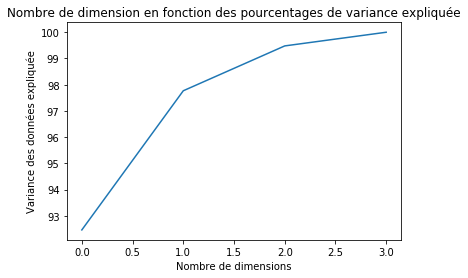

In [13]:
#Méthode vue en cours 

import matplotlib.pyplot as plt


#### 1ERE ETAPE : CENTRER LES DONNEES

#Formule : X barre = X - mean(X), avec X_barre le données centrées
X_barre = X-np.mean(X,axis=0)
#affichage de la valeur des moyennes de mes données centrées 
#print(np.mean(X_barre,axis=0)) #les valeurs doivent approximer zero


#### 2EME ETAPE : CALCULER ET VISUALISER LA MATRICE DE COVARIANCE

#Formule : Σ=1/N(X T X), avec Σ la matrice de covariance
N = X.shape[0] #nombre de lignes de X, remplacer 0 par 1 pour avoir le nombre de colonnes
matcov = (1/N)*X_barre.transpose() @ X_barre # le signe arobase, @ permet de faire une multiplication de matrices 
#print(matcov)
#plt.matshow(matcov)
#plt.colorbar()
#plt.show

#### 3EME ETAPE : CALCULER LES VALEURS PROPRES ET VECTEURS PROPRES

eigvals, eigvec = np.linalg.eigh(matcov) #eigvals : valeurs propres et eigvec : vecteurs propres
#np.linalg.eig : calcule les valeurs propres et les vecteurs propres d'un tableau de dimension 2 ou plus 
#eigh : valeurs propres et vecteurs propres d'un réseau hermitien (symétrique conjugué),réel symétrique ou complexe.
eigvals = eigvals[::-1] #récupère les valeurs propres par ordre decroissant (-1)
eigvec = eigvec[:,::-1] #recupere les vecteurs propres par ordre décroissant (-1)

#### 4EME ETAPE : VISUALISER LA VARIANCE EXPLIQUEE PAR LA DIMENSION REDUITE

#La matrice D représente l'ensemble des dimensions. 
#C'est la matrice des vecteurs propres associés aux valeurs propres de matcov ordonnée de façon décroissante.  
#On recherche le nombre de dimensions à choisir pour faire la projection
#Pour cela on représentera le pourcentage d'informations expliquées en fonction de la dimension choisie

var_xp=(np.cumsum(eigvals)/sum(eigvals)*100) #cumsum = somme cumulée de mes vecteurs propres divisée par somme des lambda i pour avoir un ratio (cf cours pour notion lambda i)
#var_xp=np.insert(var_xp,0,0)

plt.plot(var_xp)
plt.title('Nombre de dimension en fonction des pourcentages de variance expliquée')
plt.xlabel('Nombre de dimensions')
plt.ylabel('Variance des données expliquée')

La variance expliquée indique la quantité d'informations qui peut être attribuée à chacune des principales composantes. Ceci est important car même si on peut réduire un espace de 4 dimensions en un espace de 2 dimensions, on perd une partie des informations lorsque l'on effectue cela. 

Le graphique ci-dessus nous permet de constater que pour d=1, environ 97% des informations sont expliquées, pour d=2, environ 99% des informations sont expliquées. Par consequent, nous choisissons d=2.

La nouvelle base de projection a pour dimension :  (4, 2)
 
La matrice des projections de tous les points de X sur P a pour dimension :  (150, 2)


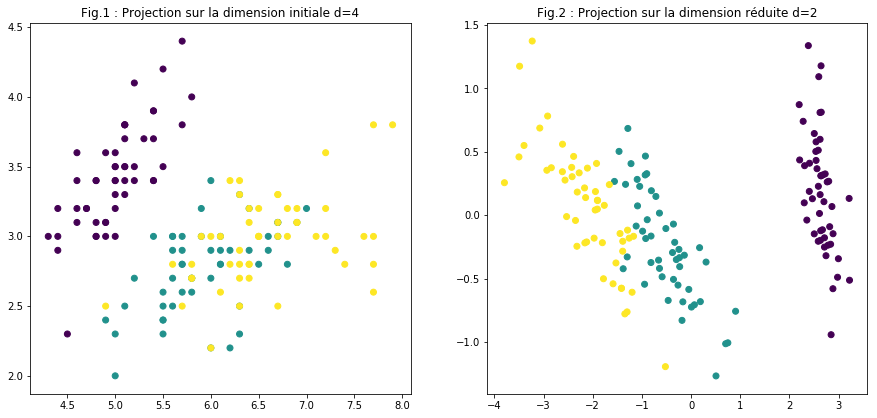

In [16]:
#### 5EME ETAPE : CALCULER LA NOUVELLE BASE DE PROJECTION

#Pour d = 2, on a notre nouvelle base P suivante:
P = eigvec[:, 0:2] #on prend les vecteurs propres associées aux 4 premières valeurs propres
print("La nouvelle base de projection a pour dimension : ",P.shape)

#### 6EME ETAPE : PROJETER LES DONNEES SUR LA NOUVELLE BASE DE PROJECTION

#P.shape, X_barre.shape
#On définit la matrice C qui est la matrice des projections de tous les points de X sur P
C=X_barre@P
print(" ")
print("La matrice des projections de tous les points de X sur P a pour dimension : ", C.shape)

#Visualisation de la projection des données sur la dimension initiale versus sur la dimension réduite 
plt.figure(figsize=[15,15])
plt.subplot(221)
plt.title("Fig.1 : Projection sur la dimension initiale d=4")
plt.scatter(X[:,0], X[:,1], c=y)
plt.subplot(222)
plt.title("Fig.2 : Projection sur la dimension réduite d=2")
plt.scatter(C[:,0],C[:,1],c=y)

Nous pouvons constater à travers le graphique fig.2 que les données sont linéairement séparables. La variance des données est maximisée pour une dimension réduite à 2. Les 3 classes sont bien représentées et bien délimitées. Une classe est très distincte (celle représentée en violet) alors que les 2 autres se superposent un peu. 

>>>> Récapitulatif des 6 étapes à effectuer pour implémenter l'ACP à la main : 
- 1ère étape : centrer les données 
- 2ème étape : calculer et visualiser la matrice de covariance
- 3ème étape : calculer les valeurs propres et vecteurs propres
- 4ème étape : visualiser le pourcentage de variance expliquée en fonction des dimensions 
- 5ème étape : chosir la dimension réduite qui maximise la variance et minimise l'erreur, puis calculer la nouvelle base de projection
- 6ème étape : projeter les données sur la nouvelle base de projection et visualiser la projection sur la dimension réduite

# 2 - ACP et méthode non-linéaire de projection

Pour rappel, il existe 2 types d'algorithmes en Machine Learning : 
- supervisés (exemple : classification, regression)
- non-supervisés (algorithmes pour lesquels on ne distingue pas de “cible” explicite dans les données d’entraînement, exemple : k-means, algorithmes de réduction de dimension tels que l'ACP,...)

La réduction de dimension sert à :
- la compression de données (avec perte) 
- la visualisation des données en 2D ou 3D
- l'extraction de caractéristiques potentiellement +fondamentales, +explicatives, +compactes 
- au pré-traitement => meilleure représentation de départ pour un autre algorithme (classification ou régression).

On peut classer les algorithmes de réduction de dimension en 2 catégories selon la nature du modèle :
- Modèles Linéaires Gaussiens (MLG)
- Modèle non-linéaires ou non-Gaussiens
<br>


=> Dans le 1er cas : Modèles Linéaires Gaussiens, on distingue :
    - l'ACP ou PCA traditionnelle (implémentée ci-dessus)
    - l'ACP probabiliste
    - l'analyse de facteurs

=> Dans le 2ème cas : Modèles non-linéaires ou non-Gaussiens, on distingue :
    - l'ACP à noyau (Kernel PCA)
    - l'ACI (Analyse en Composantes Indépendantes)
    - les réseaux de neurones auto-associateurs
    - la modélisation de variétés (manifold) non-linéaires (tSNE qui sera implémentée ci-dessous)


# 2.1 ACP

## 1- Chargement des données USPS (via load_digits)

In [36]:
from sklearn.datasets import load_digits
digits = load_digits()

#print(digits.keys())

Xd=digits.data
yd=digits.target

print(" ")
print("La variable Xd de type ", type(X), "a pour dimension", Xd.shape)
print(" ")
print("La variable yd de type ", type(X), "a pour dimension", yd.shape)
print(" ")

#choix de 2 nombres etre 1 et 9
ind=((yd==2)|(yd==5))
#print(ind)

#extraction des valeurs 2 et 5
Xd_subset=Xd[ind,:] 
yd_subset=yd[ind]

print("La variable Xd_subset de type ", type(Xd_subset), "a pour dimension", Xd_subset.shape)
print(" ")
print("La variable yd_subset de type ", type(yd_subset), "a pour dimension", yd_subset.shape)
print(" ")


 
La variable Xd de type  <class 'numpy.ndarray'> a pour dimension (1797, 64)
 
La variable yd de type  <class 'numpy.ndarray'> a pour dimension (1797,)
 
La variable Xd_subset de type  <class 'numpy.ndarray'> a pour dimension (359, 64)
 
La variable yd_subset de type  <class 'numpy.ndarray'> a pour dimension (359,)
 


## a) 1ère méthode : utilisation de sklearn

In [37]:
from sklearn import preprocessing
from sklearn import decomposition
import matplotlib.pyplot as plt
import numpy as np

### 1ere etape : standardiser les données (centrer et réduire)

std_scale = preprocessing.StandardScaler().fit(Xd)
Xd_scaled = std_scale.transform(Xd)
print(" ")
print("L'écart-type des données normalisées est égal à : " ,np.std(Xd_scaled), ".") #ecart type = 1 permet de confirmer que la normalisation (centrer et reduite) des données a bien été effectuée


### 2eme etape : calculer les composantes principales et le pourcentage de variance expliquée
n_comp=2
pca = decomposition.PCA(n_components=n_comp)
pca.fit(Xd_scaled)

#calculer le pourcentage de variance expliquée 
print(" ")
print("Les ", n_comp, " composantes principales expliquent chacune respectivement :", pca.explained_variance_ratio_*100, "% de la variance observée dans les données.") #donne le pourcentage de var expliquee pour chacune des 2 composantes principales
print(" ")
print("Une dimension reduite à d = ",n_comp, " explique ",pca.explained_variance_ratio_.sum()*100, "% de la variance totale.")
print(" ")

 
L'écart-type des données normalisées est égal à :  0.9762812094883324 .
 
Les  2  composantes principales expliquent chacune respectivement : [12.03391609  9.56105437] % de la variance observée dans les données.
 
Une dimension reduite à d =  2  explique  21.594970460789682 % de la variance totale.
 


Avec une dimension égale à 2, la perte d'informations est trop importante. Nous refaisons tourner l'ACP en testant plusieurs valeurs de n_comp jusqu'à obtenir une valeur du pourcentage de variance expliquée satisfaisante. 

In [38]:
from sklearn import preprocessing
from sklearn import decomposition
import matplotlib.pyplot as plt
import numpy as np

### 1ere etape : standardiser les données (centrer et réduire)

std_scale = preprocessing.StandardScaler().fit(Xd)
Xd_scaled = std_scale.transform(Xd)
print(" ")
print("L'écart-type des données normalisées est égal à : " ,np.std(Xd_scaled), ".") #ecart type = 1 permet de confirmer que la normalisation (centrer et reduite) des données a bien été effectuée


### 2eme etape : calculer les composantes principales et le pourcentage de variance expliquée
n_comp=40
pca = decomposition.PCA(n_components=n_comp)
pca.fit(Xd_scaled)

#calculer le pourcentage de variance expliquée 
print(" ")
print("Les ", n_comp, " composantes principales expliquent chacune respectivement :", pca.explained_variance_ratio_*100, "% de la variance observée dans les données.") #donne le pourcentage de var expliquee pour chacune des 2 composantes principales
print(" ")
print("Une dimension reduite à d = ",n_comp, " explique ",pca.explained_variance_ratio_.sum()*100, "% de la variance totale.")
print(" ")

 
L'écart-type des données normalisées est égal à :  0.9762812094883324 .
 
Les  40  composantes principales expliquent chacune respectivement : [12.0339161   9.5610544   8.44441489  6.49840791  4.86015488  4.21411987
  3.9420828   3.38938092  2.99822101  2.93200255  2.78180546  2.57705509
  2.2753033   2.22717974  2.16522943  1.91416656  1.77554706  1.63806925
  1.59646016  1.48919113  1.34796938  1.27193111  1.16583702  1.05764551
  0.97531138  0.94455273  0.8629878   0.83664224  0.79769043  0.74646957
  0.72557277  0.6918979   0.65385773  0.64073785  0.59128548  0.57109984
  0.52340872  0.48165288  0.45296587  0.42292481] % de la variance observée dans les données.
 
Une dimension reduite à d =  40  explique  95.07620354017509 % de la variance totale.
 


On constate qu'une dimension réduite à 40 explique 95% de la variance totale. Par conséquent nous choisirons cette valeur comme nouvelle dimension. 

 
Les données Xd_projected ont pour dimension : (1797, 40)


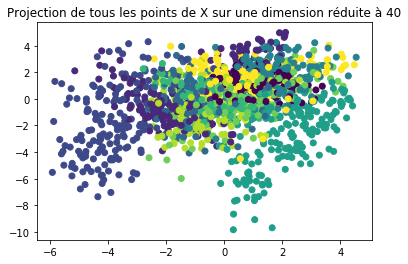

In [45]:
### 3eme etape : projeter Xd sur les composantes principales

Xd_projected = pca.transform(Xd_scaled)

# afficher chaque observation

#graphique simple 
plt.title("Projection de tous les points de X sur une dimension réduite à 40")
plt.scatter(Xd_projected[:, 0], Xd_projected[:, 1],c=yd) #c=la variable à expliquer(ou variable cible) initiale, sans manip
print(" ")
print("Les données Xd_projected ont pour dimension :",Xd_projected.shape,)


#graphique plus joli
#fig = plt.figure(figsize = (4,4))
#ax = fig.add_subplot(1,1,1) 
#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
#ax.set_title('2 components PCA', fontsize = 20)
#plt.scatter(Xd_projected[:, 0], Xd_projected[:, 1],c=yd) #c=la variable à expliquer(ou variable cible) initiale, sans manip
#plt.xlim([-5.5, 5.5])
#plt.ylim([-4, 4])
#plt.colorbar()
#ax.grid()

Etant donné la taille conséquente de nos données ici (1797, 40), il est difficile à partir du graphique ci-dessus de déterminer avec exactitude qu'elles sont bien délimitées et bien distinctes. Refaisons le même exercice avec une partie des données, à savoir les variables Xd_subset et yd_subset, qui représentent respectivement les chiffres 2 et 5.

In [43]:
from sklearn import preprocessing
from sklearn import decomposition
import matplotlib.pyplot as plt
import numpy as np

### 1ere etape : standardiser les données (centrer et réduire)

std_scale = preprocessing.StandardScaler().fit(Xd_subset)
Xd_subset_scaled = std_scale.transform(Xd_subset)
print(" ")
print("L'écart-type des données normalisées est égal à : " ,np.std(Xd_subset_scaled), ".") #ecart type = 1 permet de confirmer que la normalisation (centrer et reduite) des données a bien été effectuée


### 2eme etape : calculer les composantes principales et le pourcentage de variance expliquée
n_comp=40
pca = decomposition.PCA(n_components=n_comp)
pca.fit(Xd_subset_scaled)

#calculer le pourcentage de variance expliquée 
print(" ")
print("Les ", n_comp, " composantes principales expliquent chacune respectivement :", pca.explained_variance_ratio_*100, "% de la variance observée dans les données.") #donne le pourcentage de var expliquee pour chacune des 2 composantes principales
print(" ")
print("Une dimension reduite à d = ",n_comp, " explique ",pca.explained_variance_ratio_.sum()*100, "% de la variance totale.")
print(" ")

 
L'écart-type des données normalisées est égal à :  0.9437293044088435 .
 
Les  40  composantes principales expliquent chacune respectivement : [17.50125035 11.46068257  8.42075462  7.28901796  4.53674284  4.44049917
  3.68319488  3.33683584  2.814555    2.56632841  2.35451989  2.16540015
  2.08316453  2.03579394  1.80940586  1.72738662  1.67573523  1.58580014
  1.50227627  1.39574474  1.27287918  1.14370188  1.03875571  0.95548365
  0.93818433  0.85695065  0.80579275  0.73303448  0.63240787  0.59555092
  0.57241976  0.50233038  0.49281208  0.46225739  0.44667713  0.39108639
  0.3567285   0.34489367  0.32853102  0.28410506] % de la variance observée dans les données.
 
Une dimension reduite à d =  40  explique  97.53967182370876 % de la variance totale.
 


 
Les données Xd_subset_projected ont pour dimension : (359, 40)


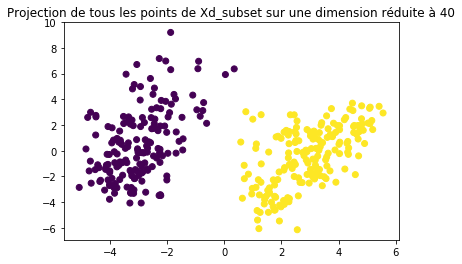

In [46]:
### 3eme etape : projeter Xd sur les composantes principales

Xd_subset_projected = pca.transform(Xd_subset_scaled)

# afficher chaque observation

#graphique simple 

plt.title("Projection de tous les points de Xd_subset sur une dimension réduite à 40")
plt.scatter(Xd_subset_projected[:, 0], Xd_subset_projected[:, 1],c=yd_subset) #c=la variable à expliquer(ou variable cible) initiale, sans manip
print(" ")
print("Les données Xd_subset_projected ont pour dimension :",Xd_subset_projected.shape,)

#graphique plus joli
#fig = plt.figure(figsize = (4,4))
#ax = fig.add_subplot(1,1,1) 
#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
#ax.set_title('2 components PCA', fontsize = 20)
#plt.scatter(Xd_subset_projected[:, 0], Xd_subset_projected[:, 1],c=yd_subset) #c=la variable à expliquer(ou variable cible) initiale, sans manip
#plt.xlim([-5.5, 5.5])
#plt.ylim([-4, 4])
#plt.colorbar()
#ax.grid()

Nous pouvons constater à travers ce graphique que les données sont linéairement séparables. La variance des données est maximisée pour une dimension réduite à 40 ( la dimension initiale étant à 64). Les 2 classes sont bien représentées et bien délimitées (classe 1 représentée par le chiffre 2 et classe 2 représentée par le chiffre 5).

## b) 2ème methode : calcul à la main

### 2ème méthode : calcul à la main

Text(0, 0.5, 'Variance des données expliquée')

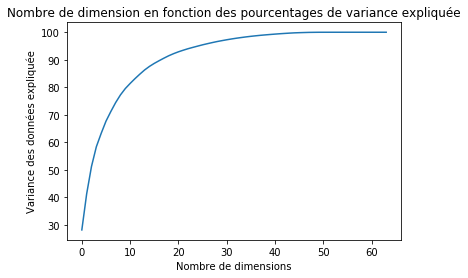

In [128]:
import matplotlib.pyplot as plt


#### 1ERE ETAPE : CENTRER LES DONNEES

#Formule : X barre = X - mean(X), avec X_barre le données centrées
Xd_subset_barre = Xd_subset-np.mean(Xd_subset,axis=0)

#affichage de la valeur des moyennes de mes données centrées 
#print(np.mean(X_barre,axis=0)) #les valeurs doivent approximer zero


#### 2EME ETAPE : CALCULER ET VISUALISER LA MATRICE DE COVARIANCE

#Formule : Σ=1/N(X T X), avec Σ la matrice de covariance
N = Xd_subset.shape[0] #ce chiffre correspond au nombre d'observations de X_subset
matcov_digits = (1/N)*Xd_subset_barre.transpose()@Xd_subset_barre #@ permet de faire une multiplication de matrice 
#print(matcov)
#plt.matshow(matcov_digits)
#plt.colorbar()
#plt.show

#### 3EME ETAPE : CALCULER LES VALEURS PROPRES ET VECTEURS PROPRES

eigvals, eigvec = np.linalg.eigh(matcov_digits) #eigvals : valeurs propres et eigvec : vecteurs propres
#np.linalg.eig : calcule les valeurs propres et les vecteurs propres d'un tableau de dimension 2 ou plus 
#eigh : valeurs propres et vecteurs propres d'un réseau hermitien (symétrique conjugué),réel symétrique ou complexe.
eigvals = eigvals[::-1] #récupère les valeurs propres par ordre decroissant (-1)
eigvec = eigvec[:,::-1] #recupere les vecteurs propres par ordre décroissant (-1)

#### 4EME ETAPE : VISUALISER LA VARIANCE EXPLIQUEE PAR LA DIMENSION REDUITE

#La matrice D représente l'ensemble des dimensions. 
#C'est la matrice des vecteurs propres associés aux valeurs propres de matcov ordonnée de façon décroissante.  
#On recherche le nombre de dimensions à choisir pour faire la projection
#Pour cela on représentera le pourcentage d'informations expliquées en fonction de la dimension choisie

var_xp=(np.cumsum(eigvals)/sum(eigvals)*100) #cumsum = somme cumulée de mes vecteurs propres divisée par somme des lambda i pour avoir un ratio (cf cours pour notion lambda i)
#var_xp=np.insert(var_xp,0,0)

plt.plot(var_xp)
plt.title('Nombre de dimension en fonction des pourcentages de variance expliquée')
plt.xlabel('Nombre de dimensions')
plt.ylabel('Variance des données expliquée')

On remarque que pour d=20, environ 84% des variances des données est expliquée. Pour d=40, environ 97% des variances des données est expliquée. Par consequent, nous choisissons d=40.

 
La nouvelle base de projection a pour dimension :  (64, 40)
 
La matrice des projections de tous les points de Xd_subset sur Pd a pour dimension :  (359, 40)
 


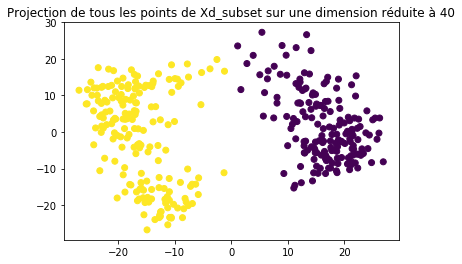

In [149]:
#### 5EME ETAPE : CALCULER LA NOUVELLE BASE DE PROJECTION

#Pour d = 40, on a notre nouvelle base P suivante:
Pd = eigvec[:, 0:40] 
print(" ")
print("La nouvelle base de projection a pour dimension : ",Pd.shape)

#### 6EME ETAPE : PROJETER LES DONNEES SUR LA NOUVELLE BASE DE PROJECTION

#Pd.shape, X_barre.shape
#On définit la matrice C qui est la matrice des projections de tous les points de X sur P
Cd=Xd_subset_barre@Pd
print(" ")
print("La matrice des projections de tous les points de Xd_subset sur Pd a pour dimension : ", Cd.shape)
print(" ")
plt.title("Projection de tous les points de Xd_subset sur une dimension réduite à 40")
plt.scatter(Cd[:,0], Cd[:,1], c=yd_subset)

Le résultat est bien similaire au résultat de la 1ère méthode (utilisation de sklearn). Nous pouvons constater à travers ce graphique que les données sont linéairement séparables. La variance des données est maximisée pour une dimension réduite à 40 ( la dimension initiale étant à 64). Les 2 classes sont bien représentées et bien délimitées (classe 1 représentée par le chiffre 2 et classe 2 représentée par le chiffre 5).

## Visualisation de la projection des données par l'ACP en 2D

In [146]:
#On définit la matrice Cd qui est la matrice des projections de tous les points de X_subset_barre sur Pd
#la projection d'un point quelconque X_subset_barre est donnée par t = Pd.transpose() * X_subset_barre

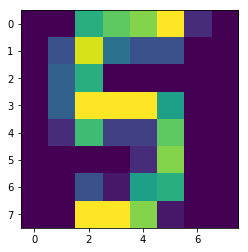

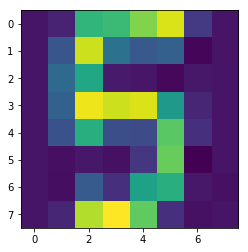

In [150]:
#Affichage 
plt.imshow(Xd_subset[124,:].reshape(8,8))

Xd_hat = (Cd@Pd.T)+np.mean(Xd_subset,axis=0)
#ti transpose = xi transpose * P => projection : xi chapeau transpose = ti transpose * P transpose 

#matrice P : matrice P d'un passage à l'autre. 
#T = X.P(proj)
#X chapeau = T.P transpose()

plt.figure()
plt.imshow(Xd_hat[124,:].reshape(8,8))

L'image projetée sur la dimension réduite est plus floue que la première image car la réduction de dimension entraine une perte d'informations

# 2.2 t-SNE

L'algorithme t-SNE (t-distributed stochastic neighbor embedding) est une technique de réduction de dimension pour la visualisation de données développée par Geoffrey Hinton et Laurens van der Maaten. Il s'agit d'une méthode non-linéaire permettant de représenter un ensemble de points d'un espace à grande dimension dans un espace de deux ou trois dimensions, les données peuvent ensuite être visualisées avec un nuage de points. L'algorithme t-SNE tente de trouver une configuration optimale selon un critère de théorie de l'information pour respecter les proximités entre points : deux points qui sont proches (resp. éloignés) dans l'espace d'origine devront être proches (resp. éloignés) dans l'espace de faible dimension.

L'algorithme t-SNE se base sur une interprétation probabiliste des proximités. Une distribution de probabilité est définie sur les paires de points de l'espace d'origine de telle sorte que des points proches l'un de l'autre ont une forte probabilité d'être choisis tandis que des points éloignés ont une faible probabilité d'être sélectionnés. Une distribution de probabilité est également définie de la même manière pour l'espace de visualisation. L'algorithme t-SNE consiste à faire concorder les deux densités de probabilité, en minimisant la divergence de Kullback-Leibler entre les deux distributions par rapport à l'emplacement des points sur la carte.

L'algorithme t-SNE a été utilisée pour de nombreuses applications : traitement d'images, la NLP, traitement des données génomiques, traitement de la parole, analyse de la musique, recherche sur le cancer, bioinformatique, traitement de signaux biomédicaux. 

Cette méthode est souvent utilisée pour la visualisation de représentations de haut-niveau apprises par un réseau de neurones artificiel.
<br>

<br>
<br>
<strong> Résumé : </strong> (source Openclassroom), cette technique permet de visualiser des données de (très) grandes dimensions, en effectuant un plongement (embedding en anglais) dans une variété de plus petite dimension, généralement 2 ou 3 pour pouvoir repérer des caractéristiques intéressantes du phénomène à modéliser. Elle est devenue populaire pour sa capacité à générer des visualisations très parlantes.

Le t-SNE met l’accent sur les petites distances. Le concept général de l’algorithme est de considérer chaque point de données séparément, et d’assigner une probabilité conditionnelle (un poids) gaussienne à chacun des autres points en fonction de leur distance par rapport à ce point.

Une fois toutes ces probabilités calculées Pij
 , on peut plonger dans une dimension inférieure ce jeu de données en calculant une nouvelle distribution Qij
 (qui est une t-student distribution cette fois, d’où le “t”), qui minimise la KL divergence entre P et Q.

L’idée est de trouver un espace de dimension inférieure mais qui respecte une distribution proche en KL divergence de la distribution d’origine.

L’algorithme du t-SNE est une recherche de minimum local (pas global), puisqu’elle met plus de poids sur les petites distances entre les points du jeu de données.

L’algorithme t-SNE qui est une des méthodes les plus utilisées pour visualiser des données à grandes dimensions non-linéaires afin de repérer des structures locales intéressantes pour le travail de modélisation.

## a) 1ère methode : sklearn 

In [104]:
from sklearn.manifold import TSNE
import numpy as np
from sklearn.datasets import load_digits
from time import time 

digits = load_digits()

#print(digits.keys())

Xd=digits.data
yd=digits.target

print(" ")
print("La variable Xd de type ", type(X), "a pour dimension", Xd.shape)
print(" ")
print("La variable yd de type ", type(X), "a pour dimension", yd.shape)
print(" ")

#choix de 2 nombres etre 1 et 9
ind=((yd==2)|(yd==5))
#print(ind)

#extraction des valeurs 2 et 5
Xd_subset=Xd[ind,:] 
yd_subset=yd[ind]

print("La variable Xd_subset de type ", type(Xd_subset), "a pour dimension", Xd_subset.shape)
print(" ")
print("La variable yd_subset de type ", type(yd_subset), "a pour dimension", yd_subset.shape)
print(" ")

 
La variable Xd de type  <class 'numpy.ndarray'> a pour dimension (1797, 64)
 
La variable yd de type  <class 'numpy.ndarray'> a pour dimension (1797,)
 
La variable Xd_subset de type  <class 'numpy.ndarray'> a pour dimension (359, 64)
 
La variable yd_subset de type  <class 'numpy.ndarray'> a pour dimension (359,)
 


La variable Xd_subset_TSNE a pour dimension  [[ -6.926748    11.761259  ]
 [  6.841564   -24.259708  ]
 [-13.51423     25.06305   ]
 [ 17.269205   -10.881111  ]
 [-14.11672     16.004404  ]
 [ 23.668913   -15.720466  ]
 [  8.602257   -16.417336  ]
 [ 13.52434    -14.716572  ]
 [ 13.4155445  -14.72448   ]
 [ 14.336451   -13.860015  ]
 [ -7.7083635   12.898369  ]
 [ -6.1598473   12.556164  ]
 [ -5.82944     12.848093  ]
 [ -6.656628    11.792736  ]
 [  8.360416   -14.570014  ]
 [ 14.971224   -21.330471  ]
 [ -5.696382    11.986652  ]
 [ -5.1407557   12.267125  ]
 [-22.51003     12.4334345 ]
 [ 16.33667    -21.019577  ]
 [ 21.572727   -15.9636545 ]
 [-12.335874    13.156322  ]
 [ -6.992185    13.003553  ]
 [ -7.9976535   13.253648  ]
 [ 20.631517   -12.462679  ]
 [ 12.629273   -15.0777235 ]
 [-24.841768    15.909332  ]
 [ 23.173334   -11.967204  ]
 [-23.297298    15.730763  ]
 [ 18.415503   -13.993255  ]
 [ -8.321822    16.970123  ]
 [ 27.726553   -11.208865  ]
 [ 20.587702   -13.395404  

Text(0.5, 1.0, 'Visualisation des données avec ACP avec temps de calcul égal à 0.0031')

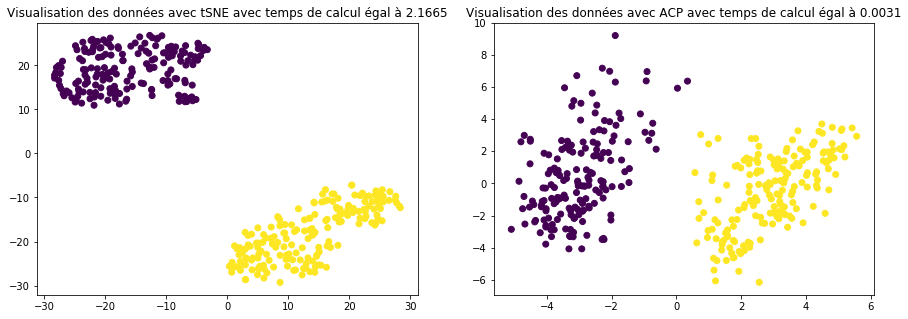

In [105]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
t0 = time()
Xd_subset_tSNE = TSNE(n_components=2).fit_transform(Xd_subset)
print("La variable Xd_subset_TSNE a pour dimension ",Xd_subset_tSNE,"et pour valeur",Xd_subset_tSNE)
temps_T= time() - t0
plt.scatter(Xd_subset_tSNE[:, 0 ], Xd_subset_tSNE[:, 1], c = yd_subset)
plt.title("Visualisation des données avec tSNE avec temps de calcul égal à %.4f"%temps_T)


plt.subplot(1,2,2)
t0 = time()
plt.scatter(Xd_subset_projected[:, 0 ], Xd_subset_projected[:, 1], c = yd_subset)
temps_A= time() - t0
plt.title("Visualisation des données avec ACP avec temps de calcul égal à %.4f"%temps_A)

Au vu des graphiques ci-dessus, nous pouvons déduire que la tSNE semble mieux séparer les 2 classes, même si le temps de calcul est beaucoup plus lent comparé au temps de calcul de l'ACP.

### Faire varier le paramètre perplexity

Le paramètre perplexité est lié au nombre de voisins les plus proches. Sa valeur par défaut dans sklearn est égale à 30. Cette valeur est modifiable et il est préconisé de sélectionner une valeur entre 5 et 50.

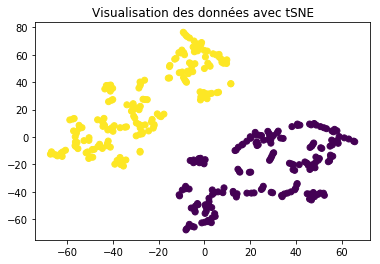

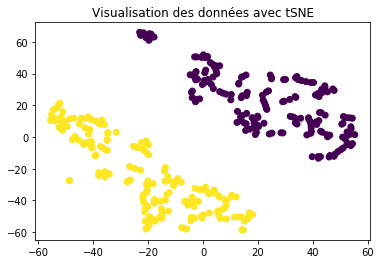

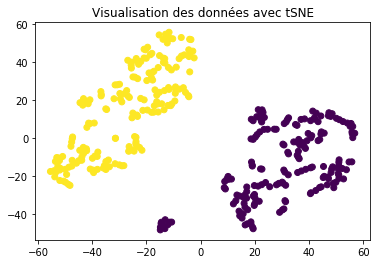

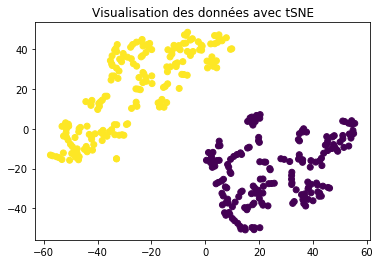

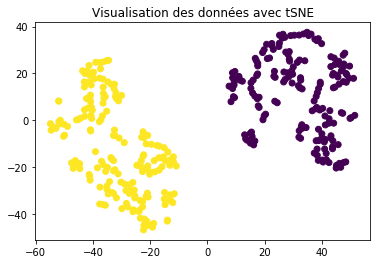

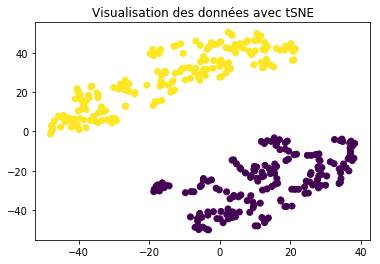

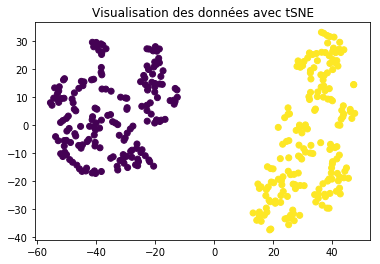

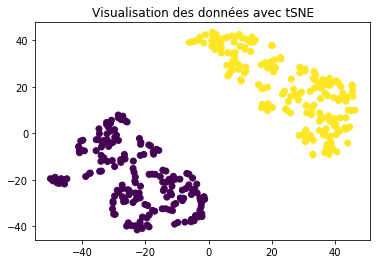

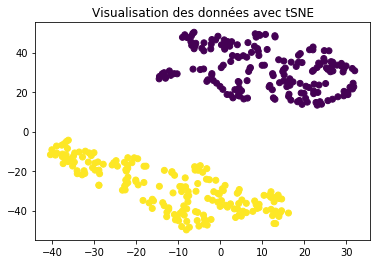

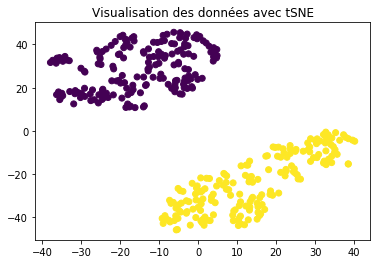

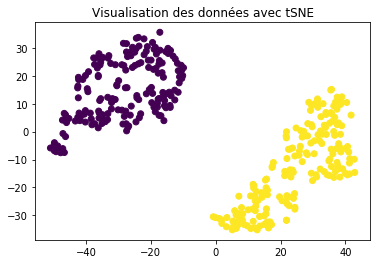

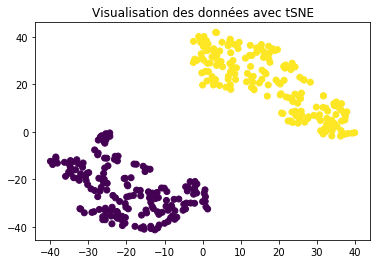

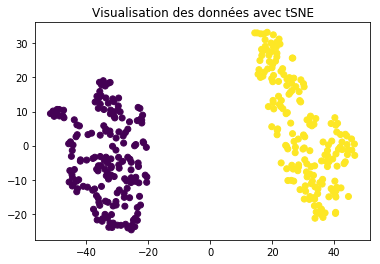

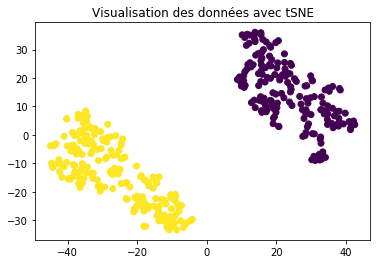

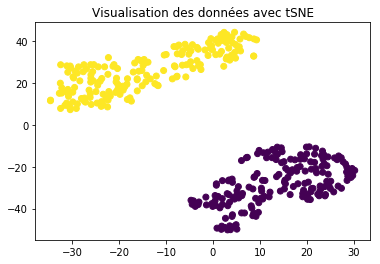

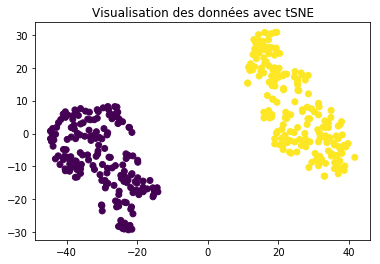

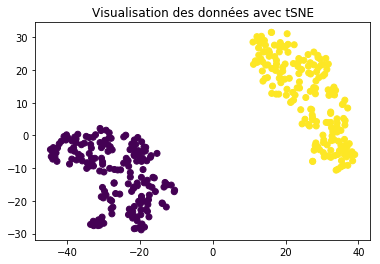

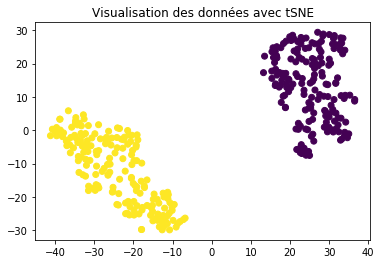

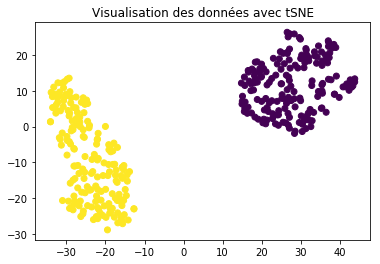

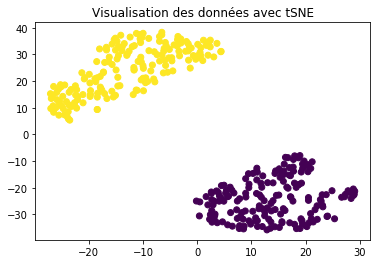

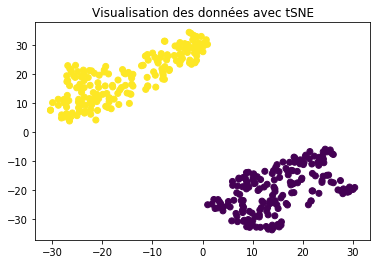

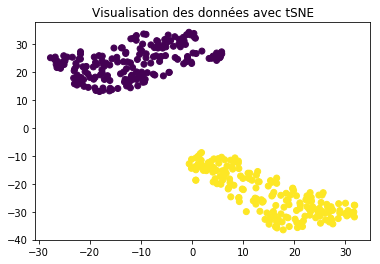

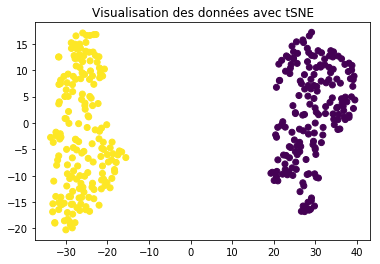

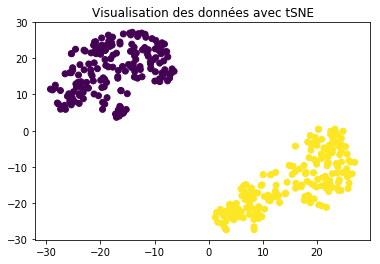

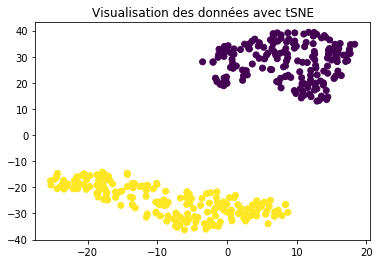

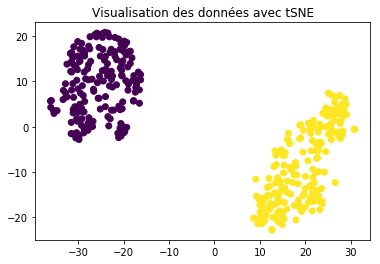

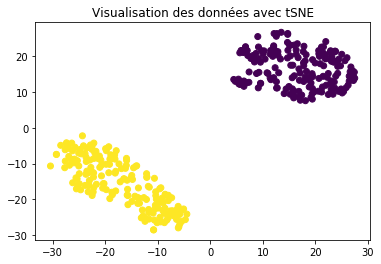

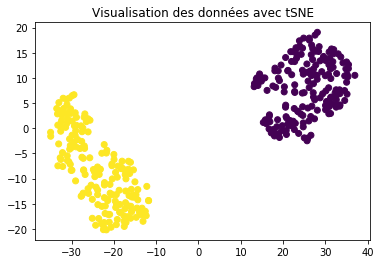

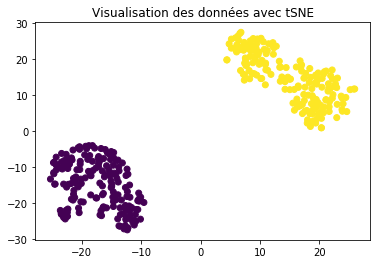

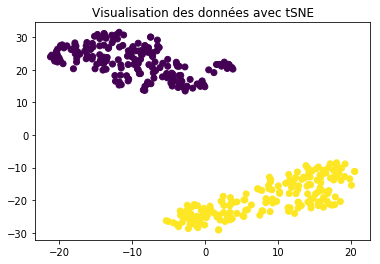

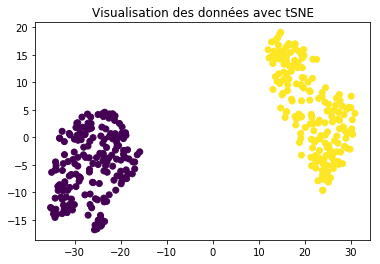

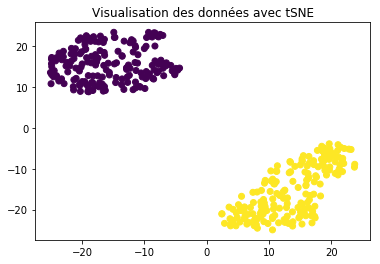

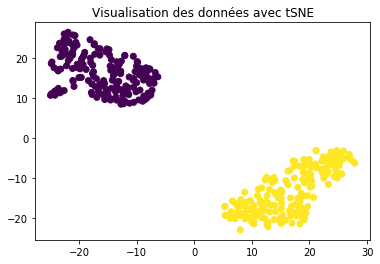

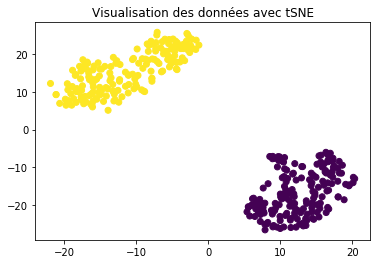

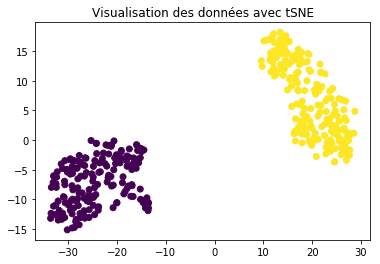

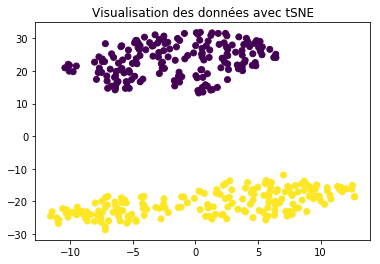

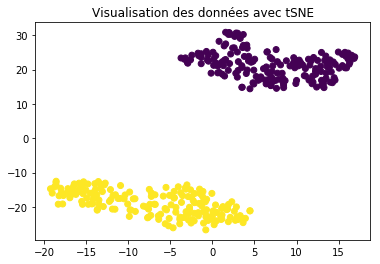

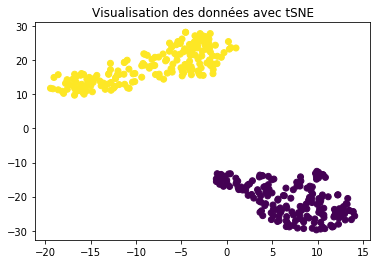

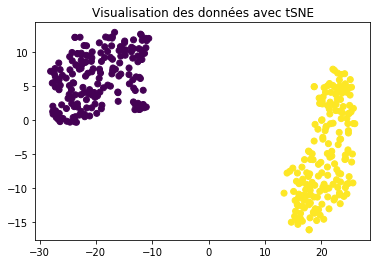

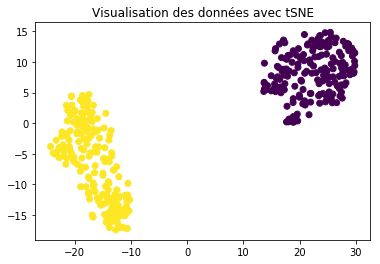

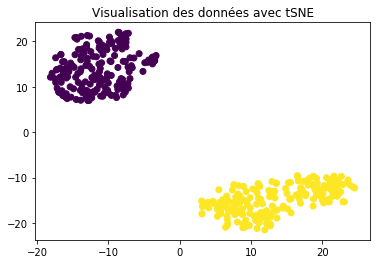

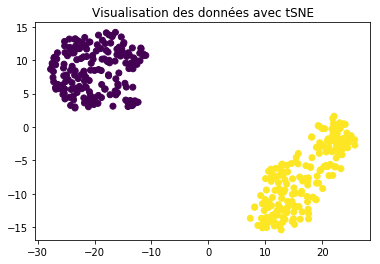

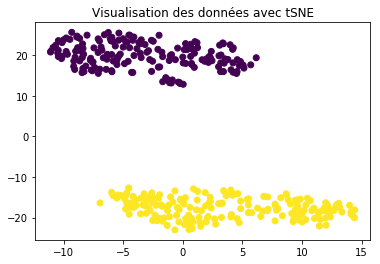

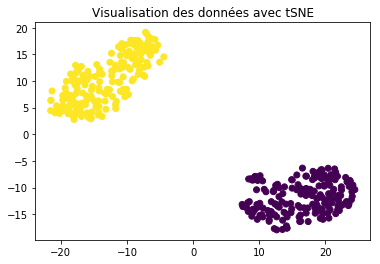

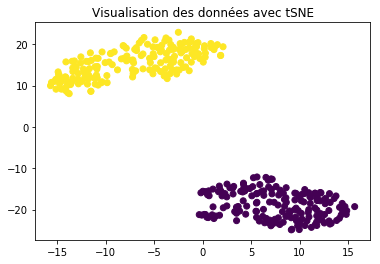

In [106]:
for i in range(5,50):# la valeur par defaut de perplexity dans sklearn est égale à 30, il est conseillé de la faire varier entre 5 et 50
    Xd_subset_tSNE = TSNE(n_components=2, perplexity=i).fit_transform(Xd_subset)
    plt.scatter(Xd_subset_tSNE[:, 0 ], Xd_subset_tSNE[:, 1], c = yd_subset)
    plt.title('Visualisation des données avec tSNE')
    plt.show()

Les graphiques ci-dessus nous permettent de constater l'importance du paramètre perplexity. Pour des valeurs comprises entre 5 et 50, on constate que les données sont projetées de manière à regrouper les deux différentes classes. Un autre attribut significatif de la fonction tSNE de sklearn est la divergence de Kullback-Leibler (kl_divergence_), (vu dans la description de l'algorithme de tSNE ci-dessus). Cet attribut permet de comparer la distribution globale (avec toutes les dimensions) et la distribution finale. Plus la divergence est faible, plus les distributions sont similaires. On remarque alors que plus la valeur de perplexity augmente, plus la divergence de Kullback-Leibler diminue. C'est pourquoi la méthode du tSNE est très pratique principalement pour la visualisation des données. 

Toutefois, pour réduire le nombre dimensions dans le but de faire une classification par la suite, il est préconisé de s'orienter vers d'autres méthodes de réduction de dimension comme l'ACP.

## b) 2ème méthode : calcul à la main

In [107]:
import numpy as np
from sklearn.manifold import TSNE

print("Xd_subset a pour dimension : ",Xd_subset.shape, "et yd_subset a pour dimension : ", yd_subset.shape)

#Renommer mes variables 
X = Xd_subset
Y = yd_subset

#Application de la tSNE

X_embedded = TSNE(n_components = 2, method='exact').fit_transform(X)
print("X_embedded a pour dimension : ",X_embedded.shape)


Xd_subset a pour dimension :  (359, 64) et yd_subset a pour dimension :  (359,)
X_embedded a pour dimension :  (359, 2)


In [108]:
#Centrer mes donnees 
#Formule : X_emb_centree = X_embedded - mean(X_embedded)

X_embedded_barre = X_embedded-np.mean(X_embedded,axis=0) #axis pour mean de vecteur
print(X_embedded_barre.shape)
print(X_embedded_barre.shape[0])

(359, 2)
359


In [109]:
matcov3 = (1/X_embedded_barre.shape[0])*X_embedded_barre.transpose() @ X_embedded_barre
print("La matrice de covariance a pour dilension : ", matcov3.shape)

La matrice de covariance a pour dilension :  (2, 2)


<function matplotlib.pyplot.show(*args, **kw)>

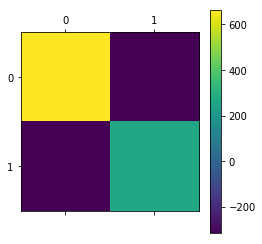

In [110]:
import matplotlib.pyplot as plt
plt.matshow(matcov3)
plt.colorbar()
plt.show

In [111]:
#Vecteurs propres

In [112]:
eigvals_t, eigvec_t = np.linalg.eigh(matcov3) 

[  9.837044 100.      ]


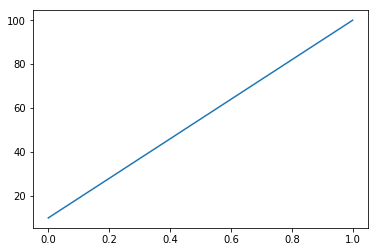

In [113]:
#Nouvelle base de representation
var_xp_t=((np.cumsum(eigvals_t)/sum(eigvals_t))*100) #cumsum = somme cumulée de mes vecteurs propres divisé par somme des lambda i pour avoir un ratio
#var_xp_t=np.insert(var_xp_t,0,0)
plt.plot(var_xp_t)
print(var_xp_t)

In [114]:
#On remarque que pour d=0,9, environ 99% des informations est projetée

In [115]:
#Pour d = 9, on a notre nouvelle base P :
P_t = eigvec_t[:, 0:9] #on prend les vecteurs propres associées aux 4 premières valeurs propres
print(P_t)

[[-0.4838155 -0.87517  ]
 [-0.87517    0.4838155]]


In [116]:
#Projection de tous les points sur P_d :
P_t.shape, X_embedded_barre.shape

((2, 2), (359, 2))

In [117]:
#On définit la matrice C_t qui est la matrice des projections de tous les points de X_X_embedded_barre sur P_t
#la projection d'un point quelconque X_embedded_barre est donnée par t = P_t.transpose() * X_embedded_barre
X_proj_t=X_embedded_barre@P_t
X_proj_t.shape

(359, 2)

In [118]:
X_embedded.shape

(359, 2)

<strong> Récapitulatif et différence entre ACP et tSNE </strong>

Bien que PCA et t-SNE aient leurs propres avantages et inconvénients, certaines différences clés entre PCA et t-SNE peuvent être notées comme suit:
- Le t-SNE est coûteux en calcul et peut prendre plusieurs heures sur des ensembles de données d'un million d'échantillons où l'ACP se terminera en quelques secondes ou minutes.
- L'ACP est une technique mathématique, tandis que le t-SNE est une technique probabiliste.
- Les algorithmes de réduction de dimensionnalité linéaire, comme PCA, se concentrent sur le placement de points de données différents très éloignés dans une représentation de dimension inférieure. Mais pour représenter des données de haute dimension sur un manifold non linéaire de faible dimension, il est essentiel que des points de données similaires soient représentés les uns à côté des autres, ce qui n'est pas le cas du t-SNE.
- Parfois, dans le t-SNE, des analyses différentes avec les mêmes hyperparamètres peuvent produire des résultats différents, de sorte que plusieurs parcelles doivent être observées avant d'effectuer une évaluation avec le t-SNE, alors que ce n'est pas le cas avec l'ACP.
- Étant donné que PCA est un algorithme linéaire, il ne sera pas en mesure d'interpréter la relation polynomiale complexe entre les entités tandis que t-SNE est conçu pour capturer exactement cela.

# 3 - Visages propres : visualisation, ACP, classification

La reconnaissance faciale consiste à identifier une personne grâce à son visage d’une manière automatique. Elle a beaucoup d’applications dans différents domaines (vidéo surveillance, biométrie, robotique …). Il est commun de confondre Reconnaissance Faciale et Détection Faciale. En effet, la détection faciale consiste simplement à détecter des visages dans une image. En d’autres termes, elle a pour but de donner une région d’intérêt appelé “bounding box” contenant le visage. 
<br>
<br>
Le dataset que nous allons utiliser dans cette partie contient des images de personnalités. Chaque image de 62 par 47 pixels a été transformée en un vecteur de dimension 2914. L’objectif est de reconnaître les visages en utilisant un algorithme de classification appliqué aux images projetées par ACP afin d’éviter de calculer des distances euclidiennes sur des vecteurs de dimension 2914 et donc améliorer les temps de calcul. L'objectif est d’avoir un bon ratio entre temps de calcul et performances obtenues.

## 1- Chargement des données

Nombre d'images : 1288
Chaque image fait 62 par 47 pixels
Nombre de variables : 2914
Nombre de classes : 7
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


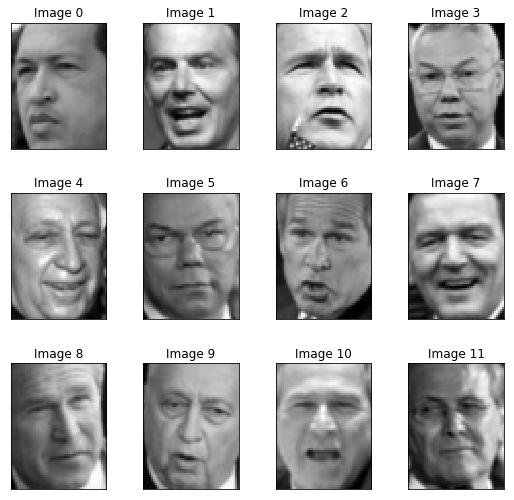

In [87]:
#import depuis faces.py Moodle

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

# Chargement du dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70)

# Recupération de la taille des images pour plot
n_samples, h, w = lfw_people.images.shape
X = lfw_people.data  # Images vectorisées
n_features = X.shape[1]

y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Nombre d'images : %d" % n_samples)
print("Chaque image fait {} par {} pixels".format(h, w))
print("Nombre de variables : %d" % n_features)
print("Nombre de classes : %d" % n_classes)
print(target_names)

image_titles = ["Image %d" % i for i in range(lfw_people.images.shape[0])]
plot_gallery(lfw_people.images, image_titles, h, w)
plt.show()

# Séparation train/test
# NE PAS CHANGER
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [92]:
# Visualisation des dimensions des données

print("La variable X_train a pour dimension :",X_train.shape)
print("La variable y_train a pour dimension :",y_train.shape)
print(" ")
print("La variable X_test a pour dimension :",X_test.shape)
print("La variable y_test a pour dimension :",y_test.shape)

La variable X_train a pour dimension : (966, 2914)
La variable y_train a pour dimension : (966,)
 
La variable X_test a pour dimension : (322, 2914)
La variable y_test a pour dimension : (322,)


In [93]:
#Découpage du jeu de données d'apprentissage
X_tr, X_val, y_tr, y_val = train_test_split(X_train,y_train,stratify = y_train)

# Visualisation des dimensions des données
print("La variable X_tr a pour dimension :",X_tr.shape)
print("La variable y_tr a pour dimension :",y_tr.shape)
print(" ")
print("La variable X_val a pour dimension :",X_val.shape)
print("La variable y_val a pour dimension :",y_val.shape)

La variable X_tr a pour dimension : (724, 2914)
La variable y_tr a pour dimension : (724,)
 
La variable X_val a pour dimension : (242, 2914)
La variable y_val a pour dimension : (242,)


#### Combinaison de PCA et KNN (k plus proches voisins)

In [94]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

PCA = PCA(svd_solver='randomized').fit(X_tr)
X_pca = PCA.transform(X_tr)
KNN = KNeighborsClassifier(n_jobs=-1).fit(X_pca,y_tr)
p = Pipeline([('pca',PCA),('knn', KNN)]) #permet de créer un pipeline p qui permet d'évaluer PCA et KNN en optant pour la 
#meilleure sélection de dimensions d et le nombre de voisins optimal k à l'aide de GridSearchCV

#### Cross-validation

In [95]:
#Utilisation de GridSearchCV afin d'effectuer la cross validation et trouver les paramètres optimaux

from sklearn.model_selection import GridSearchCV

gridsearch_parameters = {
    'knn__n_neighbors' : [3,5,7,9,11,13,15,17,19,21,23,25,27,29],
   # 'knn__weights' : ['uniform', 'distance'],
   # 'knn__metric' : ['euclidean', 'manhattan', 'minkowski'],
    'pca__n_components' : [1,2,5,8,15,30,40,50,60,120,140,150,170,190,210,240,300,400,410,420],
    'pca__whiten' : [False, True],
    #'pca__svd_solver' : ['auto', 'full','arpack','randomized'],
    #'knn__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

gridsearch = GridSearchCV(p, gridsearch_parameters, n_jobs=-1, verbose = 1, iid=False,cv=5)
gridsearch.fit(X_pca,y_tr)



Fitting 5 folds for each of 560 candidates, totalling 2800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 2800 out of 2800 | elapsed:  5.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29], 'pca__n_components': [1, 2, 5, 8, 15, 30, 40, 50, 60, 120, 140, 150, 170, 190, 210, 240, 300, 400, 410, 420], 'pca__whiten': [False, True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

#### Affichage du meilleur score,  du meilleur estimateur et des meilleurs paramètres obtenus



In [96]:
#Affichage du meilleur score obtenu
print('Le meilleur score obtenu est :',gridsearch.n_splits_)
print(" ")

#Affichage du meilleur score obtenu
print('Le meilleur estimateur obtenu est :',gridsearch.best_estimator_)
print(" ")

#Affichage des meilleurs paramètres
print('Les meilleurs paramètres obtenus sont :',gridsearch.best_params_)
print(" ")

Le meilleur score obtenu est : 5
 
Le meilleur estimateur obtenu est : Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'))])
 
Les meilleurs paramètres obtenus sont : {'knn__n_neighbors': 5, 'pca__n_components': 30, 'pca__whiten': True}
 


#### Test sur le jeu de validation et de test

In [97]:
#Test sur le jeu de validation
val_pca = PCA.transform(X_val)
y_val_pred = %time gridsearch.predict(val_pca)
print(y_val_pred)

#Test sur le jeu de test 
test_pca = PCA.transform(X_test)
y_test_pred = %time gridsearch.predict(test_pca)
print(y_test_pred)

CPU times: user 66.5 ms, sys: 3.13 ms, total: 69.6 ms
Wall time: 122 ms
[2 3 4 3 6 3 3 1 3 3 0 0 6 2 3 3 2 3 3 6 2 3 6 2 3 0 3 3 1 1 1 3 3 5 3 6 1
 4 3 4 3 3 2 6 3 5 1 3 1 3 6 2 6 1 3 3 3 6 5 3 1 1 3 0 3 1 0 3 3 3 3 3 0 2
 3 0 3 3 3 3 3 1 3 6 0 1 6 5 1 3 6 3 3 3 5 3 3 2 5 3 3 3 3 1 1 1 3 3 3 3 2
 3 3 1 6 2 1 3 1 0 3 0 3 3 3 3 3 3 3 2 1 6 1 3 1 3 1 1 0 0 3 1 3 3 3 1 3 3
 3 1 3 2 3 1 3 5 1 1 3 3 3 1 1 3 1 3 3 3 3 6 3 3 4 3 2 2 3 6 1 1 1 1 3 3 1
 3 3 5 3 1 1 1 3 3 3 3 5 2 1 3 1 0 3 6 1 3 3 1 2 6 3 4 3 0 3 6 2 0 4 1 3 6
 3 1 3 4 3 2 2 1 3 1 1 2 4 4 0 1 3 3 0 3]
CPU times: user 75.8 ms, sys: 2.59 ms, total: 78.4 ms
Wall time: 128 ms
[3 3 3 3 3 3 6 1 3 3 3 3 3 3 3 3 3 5 3 2 1 0 3 3 0 1 6 3 3 3 3 3 3 1 3 3 3
 4 5 1 3 1 3 1 3 1 4 3 3 3 3 3 0 3 3 2 1 3 3 3 1 1 1 1 3 4 6 1 1 1 1 6 3 3
 3 2 1 6 1 4 3 0 3 3 3 3 3 3 6 2 3 6 3 3 1 3 1 1 2 6 3 3 3 1 3 2 3 3 3 3 3
 1 3 0 2 1 3 3 1 3 1 3 3 0 3 3 4 3 1 1 4 6 6 3 3 6 3 3 0 1 2 2 3 1 3 5 1 3
 2 1 5 1 3 3 3 3 3 1 1 3 6 3 3 1 1 1 5 1 4 3 1 1 3 1 5 3 3 2 2 0

#### Affichage des scores KNN 

In [98]:
print("Le score KNN obtenu sur les données d'apprentissage est :",KNN.score(X_pca, y_tr))
print("Le score KNN obtenu sur les données de validation est :",KNN.score(val_pca, y_val))
print("Le score KNN obtenu sur les données de test est :",KNN.score(test_pca, y_test))

Le score KNN obtenu sur les données d'apprentissage est : 0.7209944751381215
Le score KNN obtenu sur les données de validation est : 0.5165289256198347
Le score KNN obtenu sur les données de test est : 0.5527950310559007


Le score KNN obtenu sur les données de test étant légèrement plus élevé que celui obtenu sur les données de validation, nous pouvons déduire que la classification est correcte, cependant le score obtenu est très faible.

#### Affichage de la matrice de confusion

In [100]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
print(confusion_matrix(y_val_pred,y_val, labels=range(n_classes)))

[[ 7  3  2  2  0  0  3]
 [ 5 34  5  4  3  1  0]
 [ 0  0  8 11  2  0  0]
 [ 3  6  5 76  7  6 11]
 [ 0  1  2  1  3  0  2]
 [ 1  0  0  1  1  6  0]
 [ 0  0  2  1  5  1 11]]


Interprétation de la classification obtenue :  
    
- La classification relative à la 1ère classe est égale à 6/16 et est plutôt non-satisfaisante.
- La classification relative à la 2ème classe est égale à 36/44 et est plutôt satisfaisante.
- La classification relative à la 3ème classe est égale à 8/24 et est plutôt moyenne.
- La classification relative à la 4ème classe est égale à 83/96 et est plutôt satisfaisante.
- La classification relative à la 5ème classe est égale à 8/21 et est plutôt non-satisfaisante.
- La classification relative à la 6ème classe est égale à 7/14 et est plutôt satisfaisante.
- La classification relative à la 7ème classe est égale à 7/27 et est plutôt non-satisfaisante.
 

#### Affichage du rapport de classification 

Le rapport de classification permet d'afficher la précision, le recall, le f1-score et le suport.

In [101]:
print("Matrice de confusion sur nos données de validation")
print(classification_report(y_val_pred, y_val, target_names=target_names))

Matrice de confusion sur nos données de validation
                   precision    recall  f1-score   support

     Ariel Sharon       0.44      0.41      0.42        17
     Colin Powell       0.77      0.65      0.71        52
  Donald Rumsfeld       0.33      0.38      0.36        21
    George W Bush       0.79      0.67      0.72       114
Gerhard Schroeder       0.14      0.33      0.20         9
      Hugo Chavez       0.43      0.67      0.52         9
       Tony Blair       0.41      0.55      0.47        20

        micro avg       0.60      0.60      0.60       242
        macro avg       0.47      0.52      0.49       242
     weighted avg       0.65      0.60      0.62       242



On constate que les 3 meilleures classes bien classées sont :
- Georges W Bush(f1=0.72)
- Colin Powell (f1=0.71)
- Hugo Chavez (f1 = 0.52)

Micro avg se calcule de la manière suivante : somme des scores (précision ou recall) / nombre de classes     
Macro avg se calcule de la manière suivante : TP/TP+FP avec TP : somme des true positive et FP : somme des false positive)

Micro avg est plus intéressant à regarder dans notre cas étant donné que les classes de sets sont plus variés (allant de 8 photos pour Ariel Sharon jusqu'à 132 photos pour Georges W Bush). La valeur est de 0.64 de bonne classification 

In [102]:
#Matrice de cinfusion sur les donnée de test
print("Matrice de confusion sur nos données de test")
print(confusion_matrix(y_test_pred,y_test, labels=range(n_classes)))

Matrice de confusion sur nos données de test
[[  8   1   1   2   1   0   0]
 [  2  47   4   9   4   3   3]
 [  1   1  13   8   2   0   2]
 [  1  11   8 122   8   6  13]
 [  1   0   0   1   7   1   2]
 [  0   0   0   3   0   5   0]
 [  0   0   1   1   3   0  16]]


In [103]:
#rapport de classification
print(classification_report(y_test_pred, y_test, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.62      0.62      0.62        13
     Colin Powell       0.78      0.65      0.71        72
  Donald Rumsfeld       0.48      0.48      0.48        27
    George W Bush       0.84      0.72      0.77       169
Gerhard Schroeder       0.28      0.58      0.38        12
      Hugo Chavez       0.33      0.62      0.43         8
       Tony Blair       0.44      0.76      0.56        21

        micro avg       0.68      0.68      0.68       322
        macro avg       0.54      0.63      0.57       322
     weighted avg       0.73      0.68      0.69       322



Le rapport de classification affiche un recall de 0,68 pour micro avg, ce qui signifie qu'on a 68% de bonne classification. Ce résultat est satisfaisant car est prche des 75% précisés dans l'énoncé. 